In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split

from ripper_lut_net import *

In [3]:
data_dir = "data/100_bit_artificial"
dataset_file_path = os.path.join(data_dir, "1a.csv")

dataset_df = pd.read_csv(dataset_file_path)
print(f"Dataset size: {dataset_df.shape}")
dataset_df

Dataset size: (10000, 101)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a92,a93,a94,a95,a96,a97,a98,a99,a100,class
0,False,True,False,True,True,False,True,False,False,True,...,True,False,False,True,True,True,True,True,True,False
1,True,True,False,False,False,False,False,True,False,True,...,False,True,True,False,True,False,True,True,False,True
2,True,False,True,True,True,True,False,True,True,True,...,False,True,False,False,True,False,True,True,False,True
3,True,True,True,True,False,True,False,False,True,True,...,True,False,True,False,True,True,False,True,False,False
4,True,True,True,True,True,True,False,True,True,False,...,False,False,False,False,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,True,True,False,True,True
9996,False,False,True,True,True,False,False,True,True,False,...,False,True,True,False,True,True,False,True,False,False
9997,False,True,True,True,True,True,False,True,True,True,...,False,False,False,True,False,True,True,True,False,True
9998,True,False,False,True,True,False,False,True,True,False,...,True,False,False,True,True,True,True,False,True,True


In [4]:
X = dataset_df.drop(columns=["class"]).values
y = dataset_df["class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
%%time

# simple test whether it works

lut_bits = 6
num_layers = 5

ripper_net = RipperLut(bits=[lut_bits] * (num_layers + 1), hidden_layers=[32] * num_layers, verbose=True, mode='ripper')
preds_train = ripper_net.train(X_train, y_train)
preds_test = ripper_net.predict(X_test)
print(f"Accuracy on training set: {accuracy_score(preds_train, y_train):.2f}")
print(f"Accuracy on test set: {accuracy_score(preds_test, y_test):.2f}")

100%|██████████| 5/5 [00:39<00:00,  7.88s/it]


Accuracy on training set: 0.76
Accuracy on test set: 0.73
CPU times: user 744 ms, sys: 497 ms, total: 1.24 s
Wall time: 42 s


100%|██████████| 5/5 [00:02<00:00,  2.24it/s]


Text(0, 0.5, 'Accuracy')

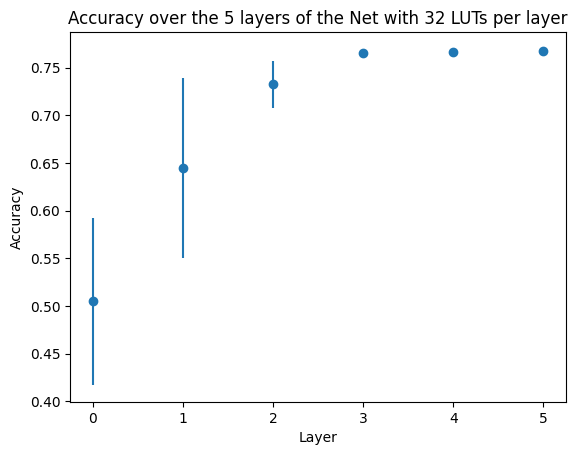

In [6]:
# experiment: accuracies over depth

num_layers = 5
num_layer_luts = 32
nums_lut_bits = 6

ripper_net = RipperLut(bits=[nums_lut_bits] * (num_layers + 1), hidden_layers=[num_layer_luts] * num_layers, verbose=True, mode='ripper')
preds_train = ripper_net.train(X_train, y_train)
preds, accs = ripper_net.get_accuracies_per_layer(X_train, y_train)

mean_accs = [np.mean(acc) for acc in accs]
std_accs = [np.std(acc) for acc in accs]

# plot over layers with std
plt.errorbar(range(num_layers + 1), mean_accs, yerr=std_accs, fmt='o')
plt.title(f"Accuracy over the 5 layers of the Net with {num_layer_luts} LUTs per layer")
plt.xlabel("Layer")
plt.ylabel("Accuracy")

2 LUTs per layer: Accuracy on training set: 0.46
2 LUTs per layer: Accuracy on test set: 0.45
4 LUTs per layer: Accuracy on training set: 0.67
4 LUTs per layer: Accuracy on test set: 0.67
8 LUTs per layer: Accuracy on training set: 0.55
8 LUTs per layer: Accuracy on test set: 0.56
16 LUTs per layer: Accuracy on training set: 0.71
16 LUTs per layer: Accuracy on test set: 0.71
32 LUTs per layer: Accuracy on training set: 0.82
32 LUTs per layer: Accuracy on test set: 0.82
64 LUTs per layer: Accuracy on training set: 0.92
64 LUTs per layer: Accuracy on test set: 0.91


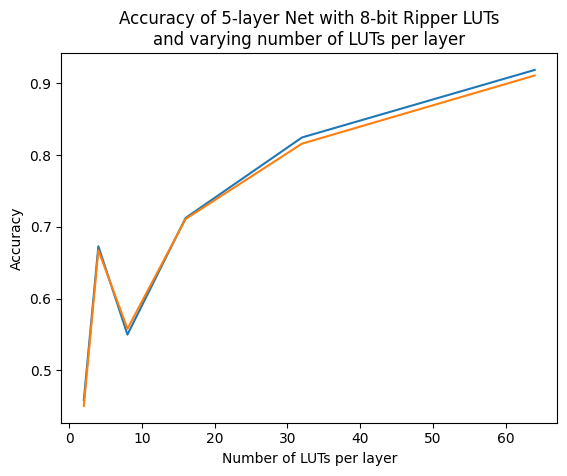

In [8]:
# experiment: accuracies with changing number of LUTs per hidden layer

num_layers = 5
nums_layer_luts = [2, 4, 8, 16, 32, 64] #, 128, 256, 512, 1024, 2048, 4096]
nums_lut_bits = 8

train_accuracies = []
test_accuracies = []
for num_layer_luts in nums_layer_luts:
    ripper_net = RipperLut(bits=[nums_lut_bits] * (num_layers + 1), hidden_layers=[num_layer_luts] * num_layers, verbose=False, mode='ripper')

    preds_train = ripper_net.train(X_train, y_train)
    preds_test = ripper_net.predict(X_test)

    train_accuracy = accuracy_score(preds_train, y_train)
    test_accuracy = accuracy_score(preds_test, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"{num_layer_luts} LUTs per layer: Accuracy on training set: {train_accuracy:.2f}")
    print(f"{num_layer_luts} LUTs per layer: Accuracy on test set: {test_accuracy:.2f}")
    

plt.plot(nums_layer_luts, train_accuracies, label="Train")
plt.plot(nums_layer_luts, test_accuracies, label="Test")
plt.title("Accuracy of 5-layer Net with 8-bit Ripper LUTs\nand varying number of LUTs per layer")
plt.xlabel("Number of LUTs per layer")
plt.ylabel("Accuracy")
plt.show()

In [11]:
# experiment: accuracies with changing number of input bits per LUT

num_layers = 5
num_layer_luts = 16
nums_lut_bits = [2, 4, 8] #, 16, 32, 64]

train_accuracies = []
test_accuracies = []
for num_lut_bits in nums_lut_bits:
    ripper_net = RipperLut(bits=[num_lut_bits] * (num_layers + 1), hidden_layers=[num_layer_luts] * num_layers, verbose=False, mode='ripper')

    preds_train = ripper_net.train(X_train, y_train)
    preds_test = ripper_net.predict(X_test)

    train_accuracy = accuracy_score(preds_train, y_train)
    test_accuracy = accuracy_score(preds_test, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"{num_lut_bits} bits per LUT: Accuracy on training set: {train_accuracy:.2f}")
    print(f"{num_lut_bits} bits per LUT: Accuracy on test set: {test_accuracy:.2f}")
    
    
plt.plot(nums_lut_bits, train_accuracies, label="Train")
plt.plot(nums_lut_bits, test_accuracies, label="Test")
plt.title("Accuracy of 5-layer Net with 1024 Ripper LUTs per layer\nand varying number of input bits per LUT")
plt.xlabel("Number of input bits per LUT")
plt.ylabel("Accuracy")
plt.show()

Process SpawnPoolWorker-855:
Traceback (most recent call last):
  File "/Users/Tonni/miniforge3/envs/rule-net/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/Tonni/miniforge3/envs/rule-net/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Tonni/miniforge3/envs/rule-net/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/Tonni/miniforge3/envs/rule-net/lib/python3.10/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
_pickle.UnpicklingError: invalid load key, '\x00'.
Process SpawnPoolWorker-856:
Traceback (most recent call last):
  File "/Users/Tonni/miniforge3/envs/rule-net/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/Tonni/miniforge3/envs/rule-net/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **sel

KeyboardInterrupt: 